## Residual calculater and plotter. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------
import parameters as p  
import functions as f   
#-------------------------------------

# Forcing wavenumber
n = 4

# Reynolds number
Re = 60

# Time & final time
t = 0.
T = 200.0
q=0

#timestep 
dt = 0.005
#Resolution
Nx = 128
Ny = 128

#Length of domain
Lx = 2*np.pi
Ly = 2*np.pi

#-------------------------------------
#-------------------------------------

# Set everything up in advance, and the initial condition
u = f.init(Nx,Ny,Lx,Ly,n,dt,Re)

#variables used for plotting animation (check this is the best implementation)
iplot = 0

tmax = int(T/dt)
tjump = int(np.ceil(0.2/dt))

sampletime  = tmax//1
sampleincs = sampletime//tjump

unew = np.zeros((Ny,Nx//2+1),dtype=complex)
unew1 = np.zeros((Ny,Nx//2+1),dtype=complex)

In [2]:
for i in range(tmax//3):
    unew = p.cn1*((p.cn2*u) + f.rk4(u))   # timestep update
    
    
    u = unew       
    t = t + dt 

In [3]:
u = unew 
j=1
P=1
tjumpinc = tjump
Store = np.zeros((sampleincs,np.size(unew[:,0]),np.size(unew[0,:])))
for i in range(sampletime):
    unew = p.cn1*((p.cn2*u) + f.rk4(u)) 
    
    if i ==0:
        Store[0,:,:] = unew[:,:]
    
    if i == tjump:    
        
        Store[P,:,:] = unew[:,:] 
        
        j+=1
        P+=1
        
        tjump = tjump+tjumpinc
        
    u = unew       
    t = t + dt 

/home/edward/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/home/edward/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [4]:
def Res(nt, dT,SymCheck):
   

    if SymCheck == 1:
        ds=Lx/10
    
        A = Store[nt,:,:]
        B = Store[nt - dT ,:,:]
    
        up = np.zeros((int(Lx/ds)+1,n))
    
        for m in range(n):
            for i in range(int(Lx/ds)+1): 

                up = np.sum(np.linalg.norm(A*np.exp(1j*p.kx*(i*ds) + 0.5j*m*np.pi*p.ky)-B))
                down = (np.linalg.norm(A))
            
        UP = np.min(up)
            
        R = UP/down
    
    else:
        
        A = Store[nt,:,:]
        B = Store[nt - dT ,:,:]
        
        up = np.sum(np.linalg.norm(A-B))
        down = (np.linalg.norm(A))
        
        R = up/down
    
            
    return R

In [5]:
Vec = np.zeros(((sampleincs,np.size(unew[:,0]),np.size(unew[0,:]))))

for i in range(1,sampleincs):
    Vec[i,:,:] = Store[i,:,:] - Store[i-1,:,:]

In [6]:
def angl(nt, dT):
  
    A = Vec[nt,:,:]
    B = Vec[nt - dT ,:,:]
    
    up = np.sum(((A)*np.conj(B)).real)
    down = ((np.linalg.norm(A))*(np.linalg.norm(B)))
    cosangl = up/down
    
    return cosangl 

In [12]:
nt = np.arange(0,sampleincs,1,dtype=int)
dT = np.arange(0,sampleincs,1,dtype=int)

X, Y = np.meshgrid(nt, dT)
delt = 0.8

comdata = np.zeros(np.shape(X))
resdata = np.zeros(np.shape(X))
angdata = np.zeros(np.shape(X))

for i in range(1,sampleincs-1):
    for j in range(1,(sampleincs)-1):
        if i-j>0 and j<sampleincs//(2*T//100):
            
            comdata[i,j] = ((1-angl(i,j)) + Res(i,j,SymCheck=0))/1 ##
            resdata[i,j] = Res(i,j,SymCheck = 0)
            angdata[i,j] = angl(i,j)

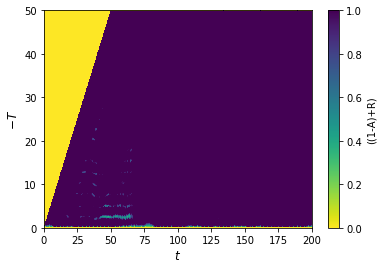

In [15]:
cmap = plt.cm.viridis
cmap_reversed = plt.cm.get_cmap('viridis_r')

plt.pcolor(Y*0.2,X*0.2, comdata,cmap =cmap_reversed)
plt.colorbar(label ='((1-A)+R)')
plt.clim(0,1)
plt.ylim(0,50)
plt.xlabel('$t$', fontsize = 12)
plt.ylabel('$-T$', fontsize = 12)
plt.savefig('combination2.png')
plt.show()

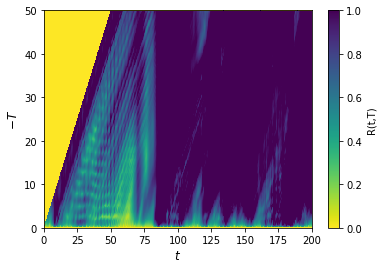

In [9]:
plt.pcolor(Y*0.2,X*0.2, resdata,cmap =cmap_reversed)
plt.colorbar(label = 'R(t,T)')
plt.clim(0,1)
plt.ylim(0,50)
plt.xlabel('$t$', fontsize = 12)
plt.ylabel('$-T$', fontsize = 12)
plt.savefig('one.png')
plt.show()

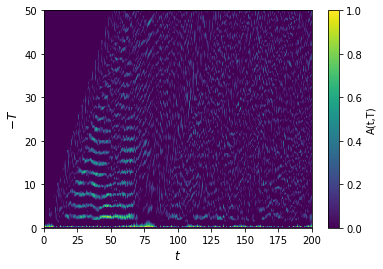

In [10]:
plt.pcolor(Y*0.2,X*0.2, angdata)
plt.colorbar(label  = 'A(t,T)')
plt.clim(0,1)
plt.ylim(0,50)
plt.xlabel('$t$', fontsize = 12)
plt.ylabel('$-T$', fontsize = 12)
plt.savefig('two.png')
plt.show()

In [11]:
#f.Residual(Y,X,data=comdata,SaveFlag =0)
#f.Residual(Y,X,data=resdata,SaveFlag = 1)
#f.Residual(Y,X,data=angdata,SaveFlag =0)